In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

/Users/wrober212/anaconda3/anaconda3/envs/eda_python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/wrober212/anaconda3/anaconda3/envs/eda_python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


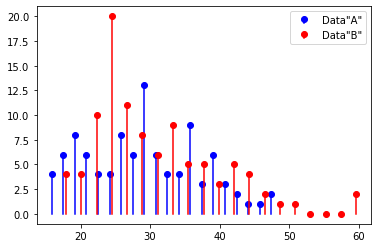

In [2]:
## simulate two distributions

# number of trials
N = 100

# dataset "A"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataA = 26-r*10

# get histogram values for later comparison
yA,xA = np.histogram(dataA,20)
xA = (xA[:-1]+xA[1:])/2

# dataset "B"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataB = 30-r*10

#get histogram values for later comparison
yB,xB = np.histogram(dataB,20)
xB = (xB[:-1]+xB[1:])/2


plt.stem(xA,yA,'b',markerfmt='bo',basefmt=' ',label='Data"A"')
plt.stem(xB,yB,'r',markerfmt='ro',basefmt=' ',label='Data"B"')
plt.legend()
plt.show()

In [12]:
## mix trials together

# concatenate trials
alldata = np.hstack((dataA,dataB))

# condition labels
conds = np.hstack((np.ones(N),2*np.ones(N)))
obsval = np.mean(alldata[conds==2]) - np.mean(alldata[conds==1])

print(f'conds: {conds}\n')
print(f'obsval: {obsval}')

conds: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2.]

obsval: 1.7316449158573626


In [15]:
obsval = np.mean(alldata[conds==2]) - np.mean(alldata[conds==1])

def gen_permdiffs(nPerms):
    permdiffs = np.zeros(nPerms)

    for permi in range(nPerms):
        fconds = np.random.permutation(N*2)
        fconds[fconds<N] = 1
        fconds[fconds>1] = 2
        permdiffs[permi] = np.mean(alldata[fconds==2]) - np.mean(alldata[fconds==1])

    return (obsval-np.mean(permdiffs) ) / np.std(permdiffs,ddof=1)

In [26]:
# p-value count
start = 10
stop  = 5000
step  = 10
num_z = np.zeros(int((stop - start) / step))
for idx,perms in enumerate(range(10,5000,10)):
    num_z[idx] = gen_permdiffs(perms)


(array([ 1.,  0.,  0.,  0.,  2.,  0.,  1.,  2.,  0.,  0.,  4.,  6., 20.,
        14., 16., 22., 18., 32., 33., 39., 39., 38., 49., 51., 54., 40.,
        54., 56., 46., 47., 50., 43., 43., 37., 31., 24., 16., 15., 11.,
        16.,  4.,  6.,  4.,  5.,  0.,  2.,  4.,  2.,  0.,  3.]),
 array([-4.33091051, -4.16832032, -4.00573013, -3.84313995, -3.68054976,
        -3.51795957, -3.35536938, -3.1927792 , -3.03018901, -2.86759882,
        -2.70500864, -2.54241845, -2.37982826, -2.21723808, -2.05464789,
        -1.8920577 , -1.72946752, -1.56687733, -1.40428714, -1.24169695,
        -1.07910677, -0.91651658, -0.75392639, -0.59133621, -0.42874602,
        -0.26615583, -0.10356565,  0.05902454,  0.22161473,  0.38420491,
         0.5467951 ,  0.70938529,  0.87197548,  1.03456566,  1.19715585,
         1.35974604,  1.52233622,  1.68492641,  1.8475166 ,  2.01010678,
         2.17269697,  2.33528716,  2.49787734,  2.66046753,  2.82305772,
         2.98564791,  3.14823809,  3.31082828,  3.47341847,

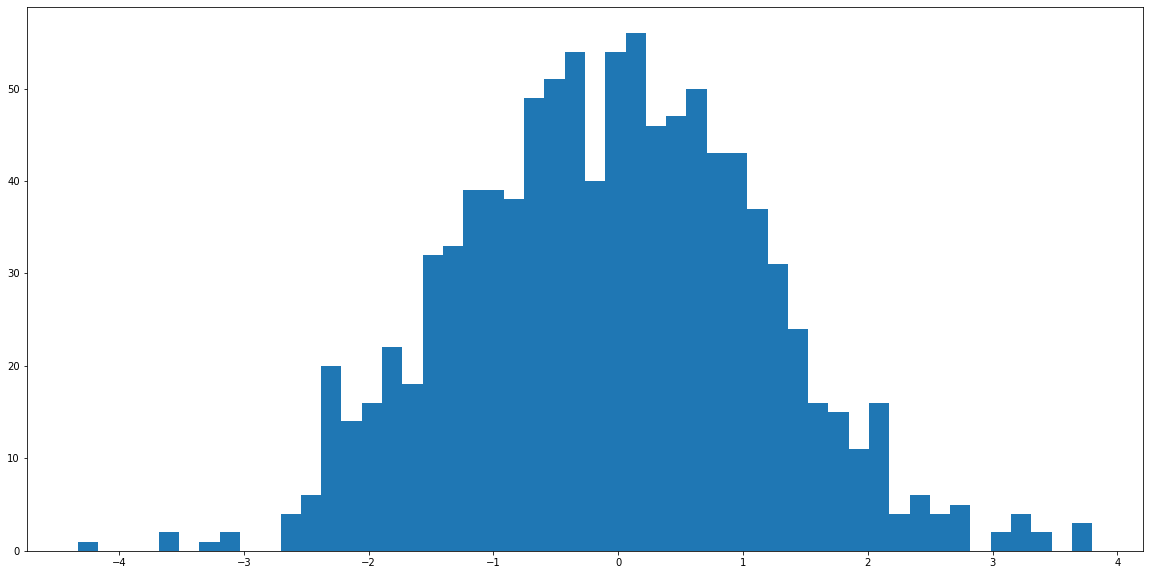

In [31]:
plt.figure(figsize=(20, 10))
# plot the distribution of H0 values
plt.hist(permdiffs,50)


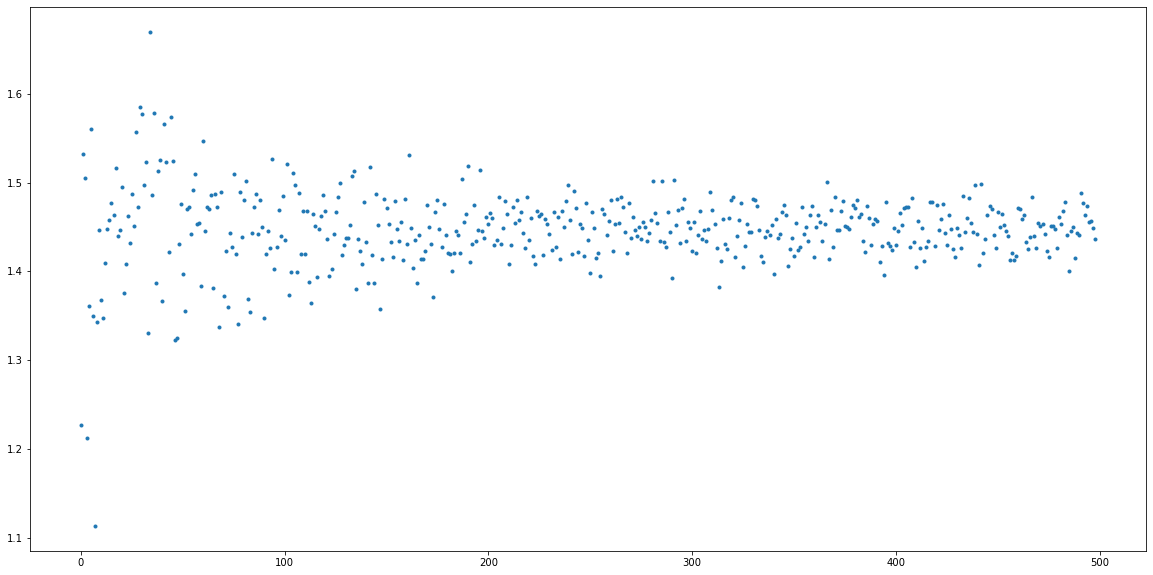

In [29]:
plt.figure(figsize=(20, 10))
# show the distribution
plt.plot(num_z,'.')
plt.show()